In [ ]:
# 1.  Carga y Exploración de Datos:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carga de datos

df = pd.read_csv('Automobile_data.csv')

# Ver las primeras filas del archivo
print(df.head(10).to_string(index = False))

 symboling normalized-losses        make fuel-type aspiration num-of-doors  body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg price
         3                 ? alfa-romero       gas        std          two convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi 3.47   2.68                9.0        111     5000        21           27 13495
         3                 ? alfa-romero       gas        std          two convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi 3.47   2.68                9.0        111     5000        21           27 16500
         1                 ? alfa-romero       gas        std          two   hatchback          rwd       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# Reemplazar ? por Nan

df.replace('?', np.nan, inplace=True)

In [ ]:
# Convertir object a numeric

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

In [ ]:
# Identificar valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [ ]:
# Reemplazar valores numñericos nulos por la media

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Reemplazar valores nulos por la moda en las columnas de tipo objeto (texto)
for column in df.select_dtypes(include=['object']):
    moda = df[column].mode()[0]  # Encuentra la moda (valor más frecuente)
    df[column] = df[column].fillna(moda)  # Asignar el resultado de fillna a la columna

df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000000
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000000
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000000
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.000000
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353


In [ ]:
# Función para calcular outliers usando el rango intercuartílico (IQR)
def count_outliers(column):
    if pd.api.types.is_numeric_dtype(column):  # Solo para columnas numéricas
        Q1 = column.quantile(0.25)  # Primer cuartil (Q1)
        Q3 = column.quantile(0.75)  # Tercer cuartil (Q3)
        IQR = Q3 - Q1  # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior
        return ((column < lower_bound) | (column > upper_bound)).sum()
    return 0  # Si no es numérica, no tiene outliers

# Aplicar la función a cada columna y obtener un resumen
outlier_counts = df.apply(count_outliers)

# Mostrar la cantidad de outliers por columna
print("Cantidad de Outliers por Columna:")
print(outlier_counts)

Cantidad de Outliers por Columna:
symboling             0
normalized-losses     8
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            3
length                1
width                 8
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size          10
fuel-system           0
bore                  0
stroke               20
compression-ratio    28
horsepower            6
peak-rpm              2
city-mpg              2
highway-mpg           3
price                14
dtype: int64


In [ ]:
# Visualizar outliers

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Lista de columnas a graficar
columns_to_plot = ['price', 'stroke', 'compression-ratio', 'horsepower', 'engine-size', 'wheel-base']

# Crear subtramas (2 gráficos por fila)
rows = (len(columns_to_plot) + 1) // 2  # Calcula cuántas filas necesitamos
fig = make_subplots(rows=rows, cols=2, subplot_titles=columns_to_plot)

# Agregar cada boxplot al subplot correspondiente
for i, column in enumerate(columns_to_plot):
    row = i // 2 + 1  # Fila actual
    col = i % 2 + 1   # Columna actual
    fig.add_trace(
        go.Box(y=df[column], name=column, boxmean=True, marker_color="royalblue"),
        row=row, col=col
    )

# Ajustar el diseño del gráfico
fig.update_layout(
    height=rows * 500,  # Altura dinámica en función del número de filas
    width=1200,          # Ancho fijo
    title_text="Boxplots de Variables Seleccionadas",
    showlegend=False
)

# Mostrar el gráfico
fig.show()

In [ ]:
# Obtener las 10 filas con los valores más altos

top_10_precio = df.nlargest(10, 'price')

# Seleccionar solo la columna make y price
top_10_precio_make = top_10_precio[['make', 'price']]

# Mostrar los datos del top 10
print("\nTop 10 filas con los valores más altos en la columna 'price': ")
print(top_10_precio_make.to_string(index = False))


top_10_engine_size = df.nlargest(10, 'engine-size')

# Seleccionar solo las columnas 'engine-size' y 'price'
top_10_engine_size_price = top_10_engine_size[['engine-size', 'price']]

# Mostrar los datos del top 10
print("\nTop 10 filas con los valores más altos en la columna 'engine-size':")
print(top_10_engine_size_price.to_string(index=False))



Top 10 filas con los valores más altos en la columna 'price': 
         make   price
mercedes-benz 45400.0
          bmw 41315.0
mercedes-benz 40960.0
      porsche 37028.0
          bmw 36880.0
       jaguar 36000.0
       jaguar 35550.0
mercedes-benz 35056.0
mercedes-benz 34184.0
      porsche 34028.0

Top 10 filas con los valores más altos en la columna 'engine-size':
 engine-size   price
         326 36000.0
         308 40960.0
         304 45400.0
         258 32250.0
         258 35550.0
         234 34184.0
         234 35056.0
         209 30760.0
         209 41315.0
         209 36880.0


In [ ]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de la columna 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calcular el IQR (Rango Intercuartílico)
IQR = Q3 - Q1

# Calcular los límites inferior y superior usando el IQR
IQR_lim_inf = Q1 - 1.5 * IQR
IQR_lim_sup = Q3 + 1.5 * IQR

# Mostrar los resultados
print(f"IQR de la columna 'price': {IQR}")
print(f"Límite inferior (IQR_lim_inf): {IQR_lim_inf}")
print(f"Límite superior (IQR_lim_sup): {IQR_lim_sup}")

IQR de la columna 'price': 8712.0
Límite inferior (IQR_lim_inf): -5280.0
Límite superior (IQR_lim_sup): 29568.0


In [ ]:
# Crear una nueva columna 'price_clipped' recortando los outliers
df['price_clipped'] = df['price'].clip(lower=IQR_lim_inf, upper=IQR_lim_sup)

# Mostrar el Top 10 de las columnas 'price' y 'price_clipped', ordenadas por 'price'
top_20 = df[['price', 'price_clipped']].nlargest(20, 'price')

# Mostrar el resultado
print("\nTop 20 filas con los valores más altos en 'price' y 'price_clipped':")
print(top_20)


Top 20 filas con los valores más altos en 'price' y 'price_clipped':
       price  price_clipped
74   45400.0        29568.0
16   41315.0        29568.0
73   40960.0        29568.0
128  37028.0        29568.0
17   36880.0        29568.0
49   36000.0        29568.0
48   35550.0        29568.0
72   35056.0        29568.0
71   34184.0        29568.0
127  34028.0        29568.0
126  32528.0        29568.0
47   32250.0        29568.0
70   31600.0        29568.0
15   30760.0        29568.0
68   28248.0        28248.0
69   28176.0        28176.0
67   25552.0        25552.0
14   24565.0        24565.0
8    23875.0        23875.0
204  22625.0        22625.0


In [ ]:
# Crear el gráfico de Boxplot para comparar 'price' y 'price_clipped'
fig = make_subplots(rows=1, cols=2, subplot_titles=['Price', 'Price Clipped'])

# Boxplot para 'price'
fig.add_trace(
    go.Box(
        y=df['price'],
        name='Price',
        boxmean=True,
        marker_color='royalblue'
    ),
    row=1, col=1
)

# Boxplot para 'price_clipped'
fig.add_trace(
    go.Box(
        y=df['price_clipped'],
        name='Price Clipped',
        boxmean=True,
        marker_color='darkorange'
    ),
    row=1, col=2
)

# Ajustes de diseño
fig.update_layout(
    height=600,
    width=1000,
    title_text="Comparación de 'Price' y 'Price Clipped'",
    showlegend=False
)

# Mostrar el gráfico
fig.show()

In [ ]:
# Transformación de variables categóricas

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Identificar las columnas de tipo texto (tipo 'object')
text_columns = df.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a todas las columnas de tipo texto
for column in text_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# Mostrar las primeras filas del DataFrame con las nuevas columnas codificadas
print(df.head().to_string(index = False))

 symboling  normalized-losses        make fuel-type aspiration num-of-doors  body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg   price  price_clipped  make_encoded  fuel-type_encoded  aspiration_encoded  num-of-doors_encoded  body-style_encoded  drive-wheels_encoded  engine-location_encoded  engine-type_encoded  num-of-cylinders_encoded  fuel-system_encoded
         3              122.0 alfa-romero       gas        std          two convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47    2.68                9.0       111.0    5000.0        21           27 13495.0        13495.0             0                  1                   0                     1                   0                     2                        0         

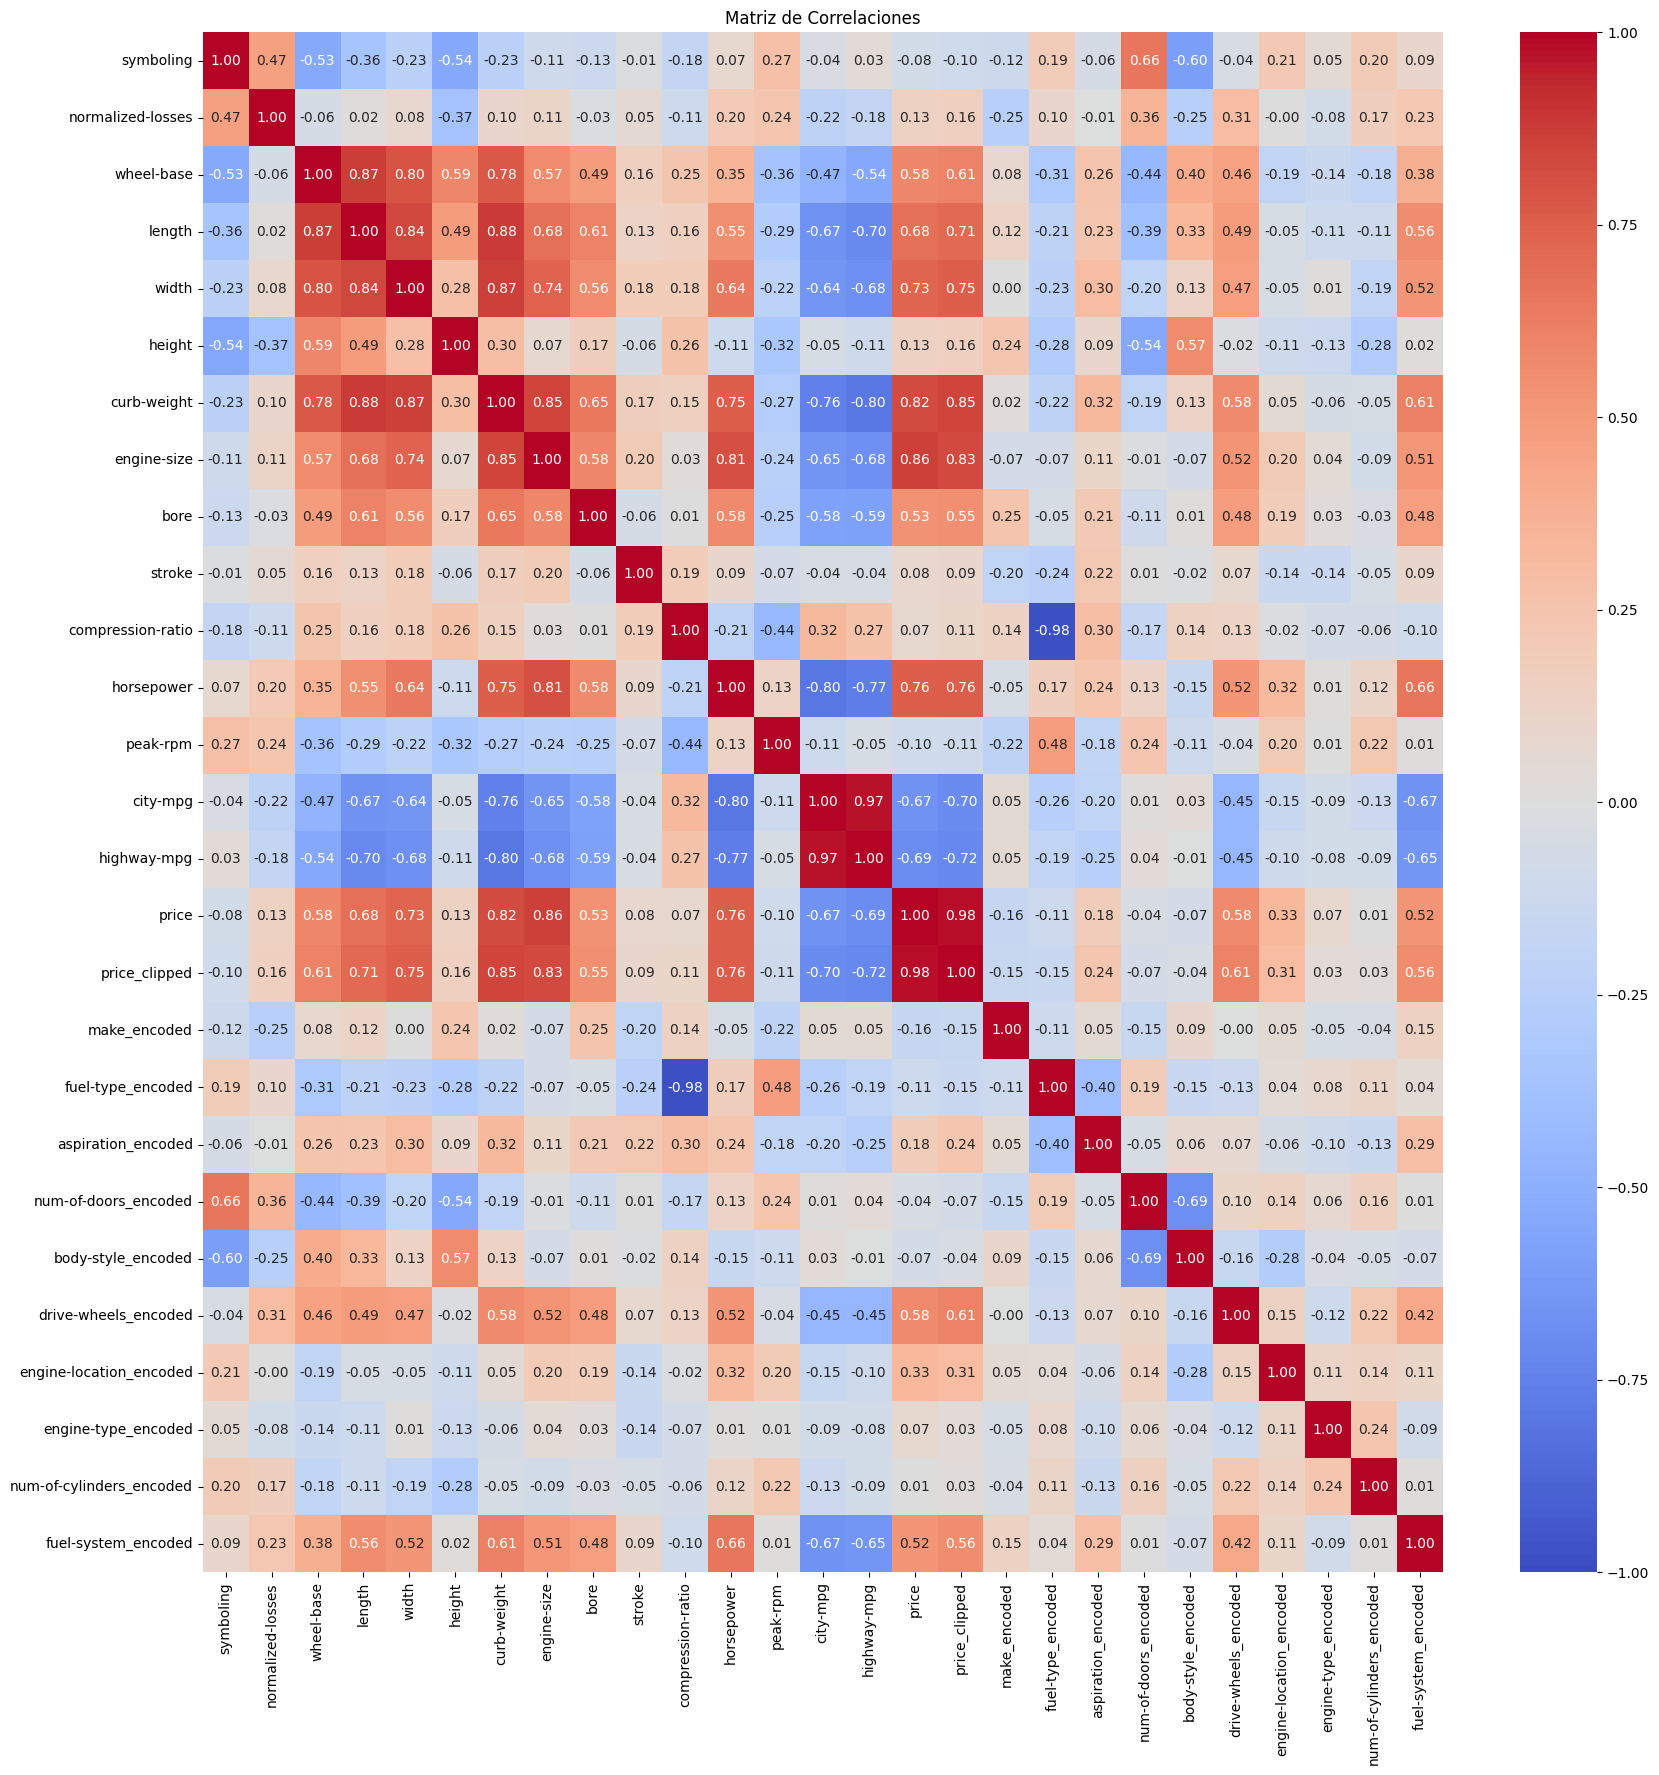

In [ ]:
# Análisis de Correlaciones

# Mapa de calor

# Seleccionamos únicamente las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Calculamos la matriz de correlaciones
correlation = numerical_df.corr()

# Creamos el mapa de calor
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlaciones')
plt.show()

In [ ]:
# Listado de Correlación

print("Características más correlacionadas con la variable objetivo (precio)")
display(correlation["price"].sort_values(ascending=False)[1:10])

Características más correlacionadas con la variable objetivo (precio)


,price
price_clipped,0.979893
engine-size,0.861752
curb-weight,0.820825
horsepower,0.757917
width,0.728699
length,0.682986
wheel-base,0.583168
drive-wheels_encoded,0.576866
bore,0.532300


In [ ]:
# 2. División conjunto de datos

# Variables independientes

X = df[['engine-size', 'curb-weight', 'horsepower']]
X

,engine-size,curb-weight,horsepower
0,130,2548,111.0
1,130,2548,111.0
2,152,2823,154.0
3,109,2337,102.0
4,136,2824,115.0
...,...,...,...
200,141,2952,114.0
201,141,3049,160.0
202,173,3012,134.0
203,145,3217,106.0


In [ ]:
# Variable independiente

y = df[['price']]
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [ ]:
# División de la data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (164, 3)
Tamaño del conjunto de prueba: (41, 3)


In [ ]:
# Escalando variables

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)
X_train_scaled

array([[ 0.18801047,  0.28128677, -0.82040007],
       [-0.15899277,  1.01604452, -0.24643327],
       [-0.85299925, -0.54164191, -1.06995085],
       [-0.72906952, -1.14708229, -0.8952653 ],
       [-0.40685223, -0.52400772, -0.47102897],
       [-0.90257114, -1.15491971, -0.92022038],
       [-0.45642412, -0.85513855, -0.79544499],
       [ 0.63415749,  1.36285018, -0.24643327],
       [ 0.73330127,  0.49877507,  1.00132064],
       [-0.90257114, -1.33713963, -0.87031022],
       [ 1.10509046,  0.82206848,  1.40060189],
       [-0.58035385, -1.05695201, -1.2446364 ],
       [-0.10942088, -0.45151162, -0.32129851],
       [-0.72906952, -1.04323653, -0.8952653 ],
       [ 0.23758236, -0.09686855,  0.1278929 ],
       [ 0.48544181, -0.03220987,  0.27762337],
       [-1.39829006, -0.34570651, -0.0967028 ],
       [ 1.67516721,  0.47722217,  2.54853548],
       [-0.85299925, -1.25092806, -0.92022038],
       [-0.45642412, -0.33590974, -0.57084929],
       [ 1.35294991,  1.00820711,  1.375

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)
y_train_scaled

array([[ 0.68644515],
       [ 0.32194874],
       [-0.82033345],
       [-0.74371535],
       [-0.53324637],
       [-0.91119381],
       [-0.80253062],
       [ 0.49602083],
       [-0.02303051],
       [-0.9024902 ],
       [ 0.45092033],
       [-0.79646447],
       [-0.55263167],
       [-0.76349627],
       [ 0.27843071],
       [-0.61843619],
       [-0.17059617],
       [ 3.15035653],
       [-1.02196696],
       [-0.51504792],
       [ 0.5354508 ],
       [-0.24932423],
       [ 0.44366733],
       [-0.32185427],
       [-0.82864143],
       [ 1.03274312],
       [-0.7706174 ],
       [ 1.17094582],
       [-0.36840537],
       [-0.81769599],
       [ 0.66086183],
       [-0.73000058],
       [-0.92886476],
       [ 0.46898691],
       [-0.47482672],
       [-0.02553609],
       [-0.04940507],
       [-0.85316978],
       [-0.68331761],
       [-0.72920934],
       [ 0.72284205],
       [ 0.48876783],
       [ 0.66086183],
       [ 0.44327171],
       [-0.91646872],
       [-0

In [ ]:
# 3. Entrenamiento del modelo

# Entrenamiento

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [ ]:
# Coeficientes del modelo

print("Coeficientes del modelo:")
print(f"Coeficientes: {model.coef_}")

Coeficientes del modelo:
Coeficientes: [[0.47660569 0.30483113 0.14904066]]


In [ ]:
# Predicciones del modelo

y_pred_scaled = model.predict(X_test_scaled)

In [ ]:
# Evaluando el modelo

mse_li = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_li = r2_score(y_test_scaled, y_pred_scaled)
print("\nMétricas de evaluación (Modelo Lineal):")
print(f"Error Cuadrático Medio (MSE): {mse_li:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_li:.2f}")



Métricas de evaluación (Modelo Lineal):
Error Cuadrático Medio (MSE): 0.27
Coeficiente de Determinación (R^2): 0.80


In [ ]:
# Mejorando el modelo

# Mejora Polinómica

import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_scaled)
y_pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test_scaled, y_pred_poly)
r2_poly = r2_score(y_test_scaled, y_pred_poly)
print("\nMétricas de evaluación (Modelo Polinómico):")
print(f"Error Cuadrático Medio (MSE): {mse_poly:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_poly:.2f}")


Métricas de evaluación (Modelo Polinómico):
Error Cuadrático Medio (MSE): 0.30
Coeficiente de Determinación (R^2): 0.78


In [ ]:
# Mejora Ridge

import numpy as np
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0)
ridge.fit(X_train_scaled, y_train_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test_scaled, y_pred_ridge)
r2_ridge = r2_score(y_test_scaled, y_pred_ridge)
print("\nMétricas de evaluación (Modelo Ridge):")
print(f"Error Cuadrático Medio (MSE): {mse_ridge:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_ridge:.2f}")


Métricas de evaluación (Modelo Ridge):
Error Cuadrático Medio (MSE): 0.27
Coeficiente de Determinación (R^2): 0.80


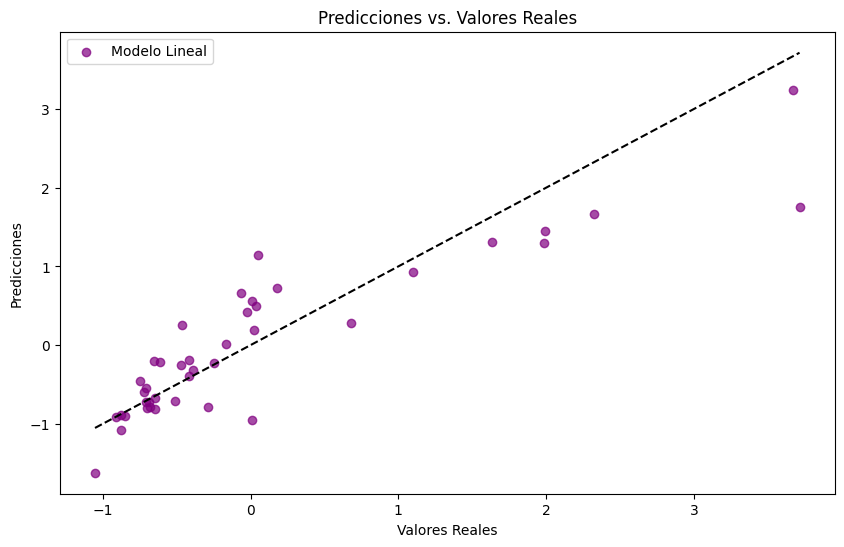

In [ ]:
# Visualizar predicciones

plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred_scaled, label='Modelo Lineal', alpha=0.7, color='purple')
plt.plot((y_test_scaled.min(), y_test_scaled.max()), (y_test_scaled.min(), y_test_scaled.max()), '--', color = 'black')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

In [ ]:
# 4. Entrenamiento del modelo con K-Nearest Neighbors (KNN):

from sklearn.neighbors import KNeighborsRegressor

# 10.a Entrenar el modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)  # K inicial
knn.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor()

In [ ]:
# Predicciones
y_pred_scaled = knn.predict(X_test_scaled)

In [ ]:
# Evaluación del modelo
mse_knn = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_knn = r2_score(y_test_scaled, y_pred_scaled)

# Resultados
print("\nMétricas de evaluación (K-Nearest Neighbors)")
print(f"Error Cuadrático Medio (MSE): {mse_knn:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_knn:.2f}")


Métricas de evaluación (K-Nearest Neighbors)
Error Cuadrático Medio (MSE): 0.39
Coeficiente de Determinación (R²): 0.71


In [ ]:
# Implementando GridsearchCV

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv = 5)
model.fit(X_train_scaled, y_train_scaled)
model.best_params_

{'n_neighbors': 2}

In [ ]:
# 5. Arbol de decisión

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train_scaled)

# Predicciones
y_pred_tree_scaled = tree_model.predict(X_test_scaled)

# Evaluación del modelo
mse_tree = mean_squared_error(y_test_scaled, y_pred_tree_scaled)
r2_tree = r2_score(y_test_scaled, y_pred_tree_scaled)

# Resultados
print("\nMétricas del modelo Árbol de decisión")
print(f"Error Cuadrático Medio (MSE): {mse_tree:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_tree:.2f}")


Métricas del modelo Árbol de decisión
Error Cuadrático Medio (MSE): 0.16
Coeficiente de Determinación (R²): 0.88


In [ ]:
# Random Forest

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)

# Predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test_scaled, y_pred_rf)
r2_rf = r2_score(y_test_scaled, y_pred_rf)

# Resultados
print("\nMétricas del modelo Random Forest")
print(f"Error Cuadrático Medio (MSE): {mse_rf:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_rf:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Métricas del modelo Random Forest
Error Cuadrático Medio (MSE): 0.12
Coeficiente de Determinación (R²): 0.91


In [ ]:
# Gradient Boosting

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train_scaled)

# Predicciones
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluación del modelo
mse_gb = mean_squared_error(y_test_scaled, y_pred_gb)
r2_gb = r2_score(y_test_scaled, y_pred_gb)
print("\nMétricas del modelo Gradient Boosting")
print(f"Error Cuadrático Medio (MSE): {mse_gb:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_gb:.2f}")


Métricas del modelo Gradient Boosting
Error Cuadrático Medio (MSE): 0.13
Coeficiente de Determinación (R²): 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
# 6. Comparación de modelos

results = pd.DataFrame({
    'Modelo' : ['Modelo Lineal', 'Modelo Polinómico', 'Modelo Ridge', 'Modelo KNN', 'Árbol de Decisión', 'Random Forest', 'Gradient Boost'],
    'MSE' : [mse_li, mse_poly, mse_ridge, mse_knn, mse_tree, mse_rf, mse_gb],
    'R²' : [r2_li, r2_poly, r2_ridge, r2_knn, r2_tree, r2_rf, r2_gb]
})

print("Comparación de Modelos:")
pd.set_option('display.float_format', '{:.2f}'.format)  # Mostrar los valores con 6 decimales o ajusta según sea necesario
print(results)

Comparación de Modelos:
              Modelo  MSE   R²
0      Modelo Lineal 0.27 0.80
1  Modelo Polinómico 0.30 0.78
2       Modelo Ridge 0.27 0.80
3         Modelo KNN 0.39 0.71
4  Árbol de Decisión 0.16 0.88
5      Random Forest 0.12 0.91
6     Gradient Boost 0.13 0.90


<ipython-input-47-3bc972274487>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




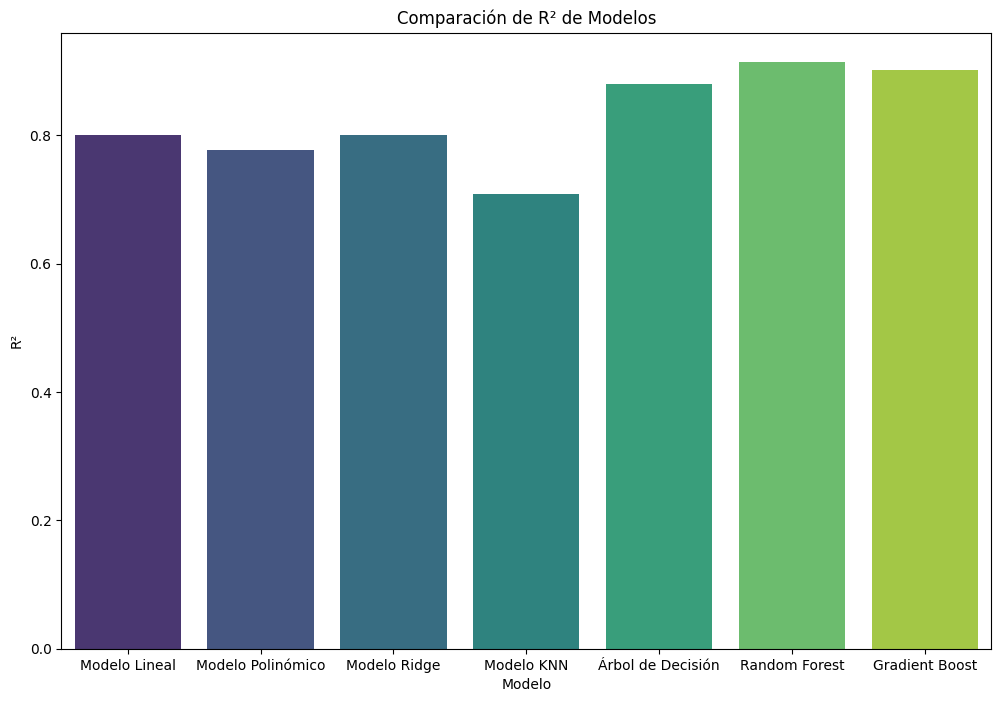

In [ ]:
# Visualizaciòn de R2

plt.figure(figsize=(12, 8))
sns.barplot(x='Modelo', y='R²', data=results, palette='viridis')
plt.title('Comparación de R² de Modelos')
plt.show()

In [ ]:
# 13. Conclusiones y recomendaciones

# Random Forest destaca como el mejor modelo debido a su combinación de bajo MSE (0.12) y alto R² (0.91). Es el modelo más preciso y con mejor capacidad de explicación entre los evaluados.